In [17]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt


In [21]:
file_path = 'dataset/data.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to confirm it's loaded correctly
print(data.head())


                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

Cleaning Data


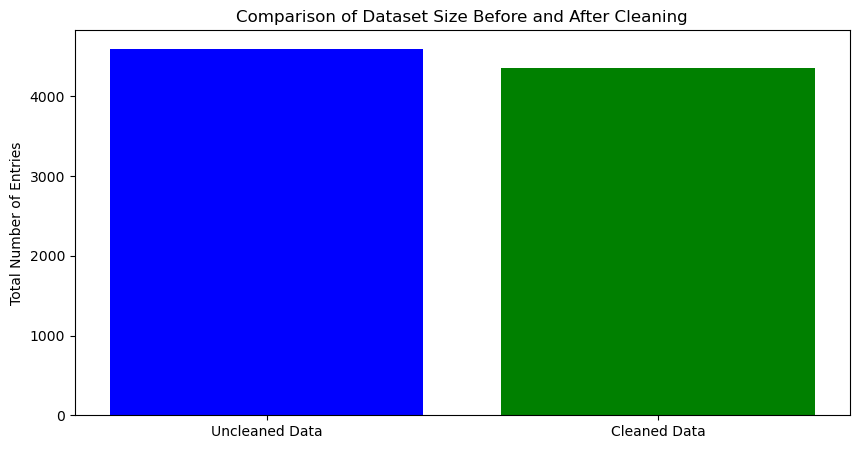

In [24]:
#Fixing date datatype from object to datetime64
data['date'] = pd.to_datetime(data['date'])

# Initial total count to showcase the difference between clean and uncleaned data
initial_count = len(data)

# Handle missing values by dropping them
data_cleaned = data.dropna()

# Remove duplicate rows
data_cleaned = data_cleaned.drop_duplicates()

# Identifying and filtering outliers in 'price'
q1 = data_cleaned['price'].quantile(0.25)
q3 = data_cleaned['price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data_cleaned = data_cleaned[(data_cleaned['price'] >= lower_bound) & (data_cleaned['price'] <= upper_bound)]

# Cleaned total count
cleaned_count = len(data_cleaned)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.bar(['Uncleaned Data', 'Cleaned Data'], [initial_count, cleaned_count], color=['blue', 'green'])
plt.ylabel('Total Number of Entries')
plt.title('Comparison of Dataset Size Before and After Cleaning')
plt.show()